<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" 
    height="360">

## Term 1 Project in Python

In [1]:
## Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import bokeh
import seaborn as sns
import pandas_profiling

/Users/pbishwal/anaconda/lib/python2.7/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/pbishwal/anaconda/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/pbishwal/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/pbishwal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/pbishwal/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/Users/pbishwal/anaconda/lib/python2.7/site-packages/ipykernel/kern

In [2]:
olympic_data=pd.read_csv("/Users/pbishwal/Documents/Techie/Python/Machine_Learning/INSAID/Term1-DataAnalyticsWithPython/olympics.csv")

In [3]:
# getting first few rows of the DataFrame
olympic_data.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [4]:
# get the column lists so that we can analyse them
olympic_data.columns

Index([u'Year', u'City', u'Sport', u'Discipline', u'Athlete', u'Country',
       u'Gender', u'Event', u'Medal'],
      dtype='object')

In [5]:
olympic_data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


### Q1. Find medals won by each country and plot the graph 

In [6]:
# get the country wise medals distribution in the olympics
medal_by_country=olympic_data.groupby(["Country","Medal"]).size()
type(medal_by_country)

pandas.core.series.Series

In [7]:
# converting the series to dataframe
medal_by_country_DF=medal_by_country.to_frame(name="medal_count")
medal_by_country_DF.head(10)

medal_count
Country Medal              
AFG     Bronze            2
AHO     Silver            1
ALG     Bronze            8
        Gold              5
        Silver            2
ANZ     Bronze            5
        Gold             20
        Silver            4
ARG     Bronze           91
        Gold             69

In [8]:
# the above dataFrame shows data in group per each country .so we need to unstack it first 
# i.e reshape by unstack and fill missing Values NaN with 0

print (medal_by_country_DF.unstack()['medal_count'].fillna(0))

Medal    Bronze    Gold  Silver
Country                        
AFG         2.0     0.0     0.0
AHO         0.0     0.0     1.0
ALG         8.0     5.0     2.0
ANZ         5.0    20.0     4.0
ARG        91.0    69.0    99.0
ARM         8.0     1.0     2.0
AUS       472.0   312.0   405.0
AUT        44.0    21.0    81.0
AZE        15.0     6.0     5.0
BAH         5.0    13.0     9.0
BAR         1.0     0.0     0.0
BDI         0.0     1.0     0.0
BEL       152.0    91.0   168.0
BER         1.0     0.0     0.0
BLR        59.0    17.0    37.0
BOH         6.0     0.0     1.0
BOT         0.0     0.0     1.0
BRA       185.0    73.0   173.0
BRN         1.0     0.0     0.0
BUL       137.0    53.0   143.0
BWI         5.0     0.0     0.0
CAN       262.0   155.0   232.0
CHI        21.0     3.0     9.0
CHN       221.0   290.0   296.0
CIV         0.0     0.0     1.0
CMR         2.0    20.0     1.0
COL        11.0     2.0     6.0
CRC         2.0     1.0     1.0
CRO        34.0    46.0    34.0
CUB     

In [9]:
medal_by_country_Final=medal_by_country_DF.unstack()['medal_count'].fillna(0)

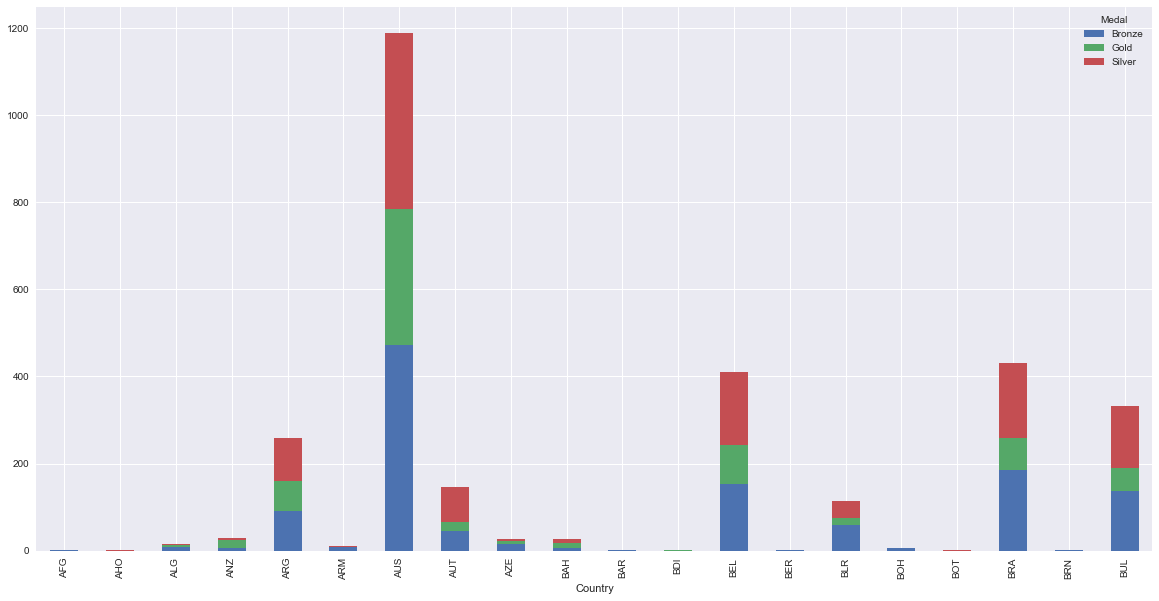

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
medal_by_country_Final.head(20).plot.bar(stacked=True,figsize=(20,10))

### Q2 .Plot medal counts for country AUSTRALIA over the years

In [11]:
# plot medal counts for country AUS over the year 
aus_data=olympic_data[olympic_data['Country']=='AUS']
aus_data.count()

Year          1189
City          1189
Sport         1189
Discipline    1189
Athlete       1189
Country       1189
Gender        1189
Event         1189
Medal         1189
dtype: int64

In [12]:
#number of medals for australia by year
# as_index=False makes year as one column of DF 
aus_medal_year=aus_data.groupby(['Year'],as_index=False).agg({'Medal': np.count_nonzero})
aus_medal_year.head(2)

,Year,Medal
0,1896,2
1,1900,5


In [13]:
aus_medal_year.columns

Index([u'Year', u'Medal'], dtype='object')

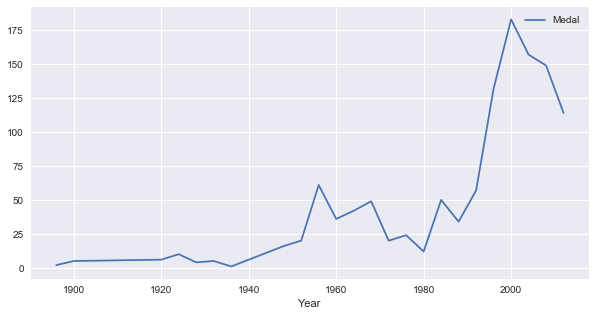

In [14]:
aus_medal_year.plot(x="Year", y=["Medal"],figsize=(10,5), grid=True)

### Q3. Compare the top 3 countries with max medals winners over the year and compare their change over year

In [15]:
#Lets compare the top 3 countries with max medals winners over the year and compare their change over year

In [16]:
#First get the top 3 countries with maximun medals 
country_with_medal=olympic_data.groupby(['Country'],as_index=False).agg({'Medal': np.count_nonzero})
country_with_medal.columns

Index([u'Country', u'Medal'], dtype='object')

In [17]:
#country_with_medal[country_with_medal['Medal']==country_with_medal['Medal'].max()]  # gives the max medal
top_3_country_with_medals=country_with_medal.nlargest(3, 'Medal') # gives nlargest
top_3_country_with_medals.columns


Index([u'Country', u'Medal'], dtype='object')

In [18]:
top3_records=olympic_data[olympic_data['Country'].isin(top_3_country_with_medals['Country'])]

top3_comparison=top3_records.groupby(['Country','Year'],as_index=False).agg({'Medal': np.count_nonzero})

In [19]:
top3_comparison.columns

Index([u'Country', u'Year', u'Medal'], dtype='object')

In [20]:
top_3_country_with_medals['ranked']=top_3_country_with_medals['Country'].rank(ascending=1)
top_3_country_with_medals

,Country,Medal,ranked
139,USA,4585,3.0
137,URS,2049,2.0
47,GBR,1720,1.0


In [21]:
year=top3_comparison['Year']
first_country=top3_comparison[top3_comparison['Country']
                .isin(top_3_country_with_medals[top_3_country_with_medals['ranked']==3]['Country'])]
second_country=top3_comparison[top3_comparison['Country']
                .isin(top_3_country_with_medals[top_3_country_with_medals['ranked']==2]['Country'])]
third_country=top3_comparison[top3_comparison['Country']
                .isin(top_3_country_with_medals[top_3_country_with_medals['ranked']==1]['Country'])]

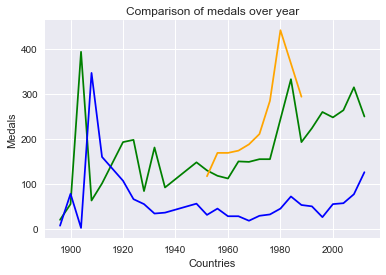

In [22]:
plt.plot(first_country['Year'], first_country['Medal'], color='g')
plt.plot(second_country['Year'], second_country['Medal'], color='orange')
plt.plot(third_country['Year'], third_country['Medal'], color='blue')

plt.xlabel('Countries')
plt.ylabel('Medals')
plt.title('Comparison of medals over year')
plt.show()

## Pre-Profiling 

In [23]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
# above is used to counter unicodedecodeerror ascii 
profile=pandas_profiling.ProfileReport(olympic_data)
profile.to_file(outputfile='before_profiling.html')

In [24]:
## Below is the few results of Pre-Profiling 

'''
Warnings

Athlete has a high cardinality: 22762 distinct values Warning
Country has 4 / 100.0% missing values Missing
Country has a high cardinality: 148 distinct values Warning
Discipline has a high cardinality: 67 distinct values Warning
Event has a high cardinality: 666 distinct values Warning
Dataset has 2 duplicate rows Warning
'''

'\nWarnings\n\nAthlete has a high cardinality: 22762 distinct values Warning\nCountry has 4 / 100.0% missing values Missing\nCountry has a high cardinality: 148 distinct values Warning\nDiscipline has a high cardinality: 67 distinct values Warning\nEvent has a high cardinality: 666 distinct values Warning\nDataset has 2 duplicate rows Warning\n'

In [26]:
olympic_data[olympic_data['Country'].isnull()].count

<bound method DataFrame.count of        Year    City          Sport           Discipline          Athlete  \
29603  2012  London      Athletics            Athletics          Pending   
31072  2012  London  Weightlifting        Weightlifting          Pending   
31091  2012  London  Weightlifting        Weightlifting          Pending   
31110  2012  London      Wrestling  Wrestling Freestyle  KUDUKHOV, Besik   

      Country Gender     Event   Medal  
29603     NaN  Women     1500M    Gold  
31072     NaN  Women      63KG    Gold  
31091     NaN    Men      94KG  Silver  
31110     NaN    Men  Wf 60 KG  Silver  >

*** drop country columns where it is null ***

In [37]:
olympic_data=olympic_data[olympic_data['Country'].notnull()]

## Post-Profiling

In [38]:
profile=pandas_profiling.ProfileReport(olympic_data)
profile.to_file(outputfile='after_profiling.html')

In [39]:
## Now all the missing values are dropped 
'''
Athlete has a high cardinality:  22761 distinct values Warning
Country has a high cardinality: 147 distinct values Warning
Discipline has a high cardinality: 67 distinct values Warning
Event has a high cardinality: 666 distinct values Warning
Year is highly correlated with index (ρ = 0.97064) Rejected
'''

'\nAthlete has a high cardinality: 22761 distinct values Warning\nCountry has a high cardinality: 147 distinct values Warning\nDiscipline has a high cardinality: 67 distinct values Warning\nEvent has a high cardinality: 666 distinct values Warning\nYear is highly correlated with index (\xcf\x81 = 0.97064) Rejected\n'

In [40]:
olympic_data.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### Q4. Which country has won more medals where Gender = Female

In [45]:
women_data=olympic_data[olympic_data['Gender']=='Women']
women_data.count()

Year          8417
City          8417
Sport         8417
Discipline    8417
Athlete       8417
Country       8417
Gender        8417
Event         8417
Medal         8417
dtype: int64

In [46]:
women_with_medal=women_data.groupby(['Country'],as_index=False).agg({'Medal': np.count_nonzero})
women_with_medal.columns

Index([u'Country', u'Medal'], dtype='object')

In [56]:
women_with_medal.head(10)

,Country,Medal
0,ALG,3
1,ANZ,2
2,ARG,72
3,AUS,493
4,AUT,21
5,AZE,6
6,BAH,13
7,BEL,20
8,BLR,62
9,BOH,1


In [54]:
#top 3 countries with max medal winners in womens 
women_with_medal.nlargest(3, 'Medal')

,Country,Medal
88,USA,1377
87,URS,573
15,CHN,537


In [55]:
women_with_medal.nsmallest(3, 'Medal')

,Country,Medal
9,BOH,1
11,BRN,1
14,CHI,1


### Q4.1 In which discipline women won more medals in USA 

In [64]:
women_data['Discipline'].nunique()

52

In [65]:
usa_women=women_data[women_data['Country']=='USA']
usa_women.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
647,1900,Paris,Tennis,Tennis,"JONES, Marion",USA,Women,Singles,Bronze
709,1904,St Louis,Archery,Archery,"POLLOCK, Jessie",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Bronze


In [87]:
discipline=usa_women.groupby(['Discipline'],as_index=False).agg({'Medal': np.count_nonzero}) 
discipline[discipline['Medal']==discipline['Medal'].max()]


,Discipline,Medal
30,Swimming,394


### Q5.Top 10 sports of olympic data where Medal won were high and see the data distribution over year for those sports 

In [88]:
sport_by_medal=olympic_data.groupby(['Sport'],as_index=False).agg({'Medal': np.count_nonzero})
sport_by_medal.columns

Index([u'Sport', u'Medal'], dtype='object')

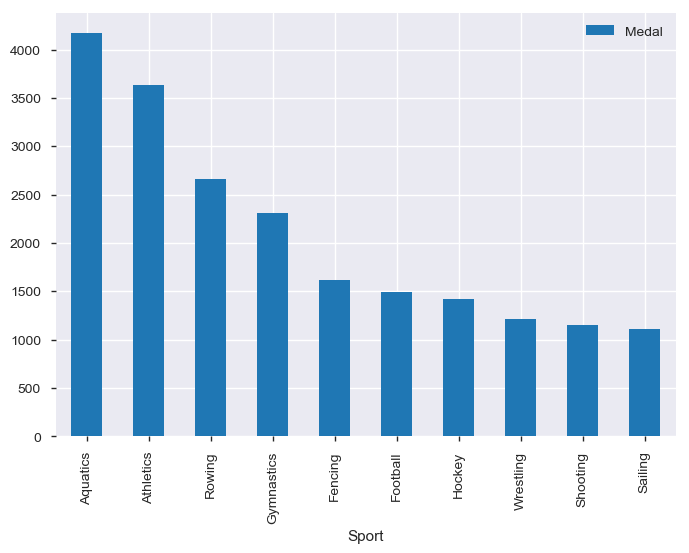

In [122]:
top10_sports=sport_by_medal.nlargest(10,'Medal')
top10_sports.set_index('Sport').plot.bar()

In [106]:
year_sport=olympic_data[olympic_data['Sport'].isin(sport_by_medal['Sport'])]
year_sport.head(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [116]:
year_sport[['Year','Sport','Medal']].groupby(['Year','Sport'],as_index=False).agg({'Medal': np.count_nonzero})

,Year,Sport,Medal
0,1896,Aquatics,11
1,1896,Athletics,37
2,1896,Cycling,16
3,1896,Fencing,8
4,1896,Gymnastics,45
5,1896,Shooting,15
6,1896,Tennis,10
7,1896,Weightlifting,6
8,1896,Wrestling,3
9,1900,Aquatics,61


### Q6.Using factorplot show the medal distribution for USA over the years 

In [169]:
usa_data=olympic_data[olympic_data['Country']=='USA']

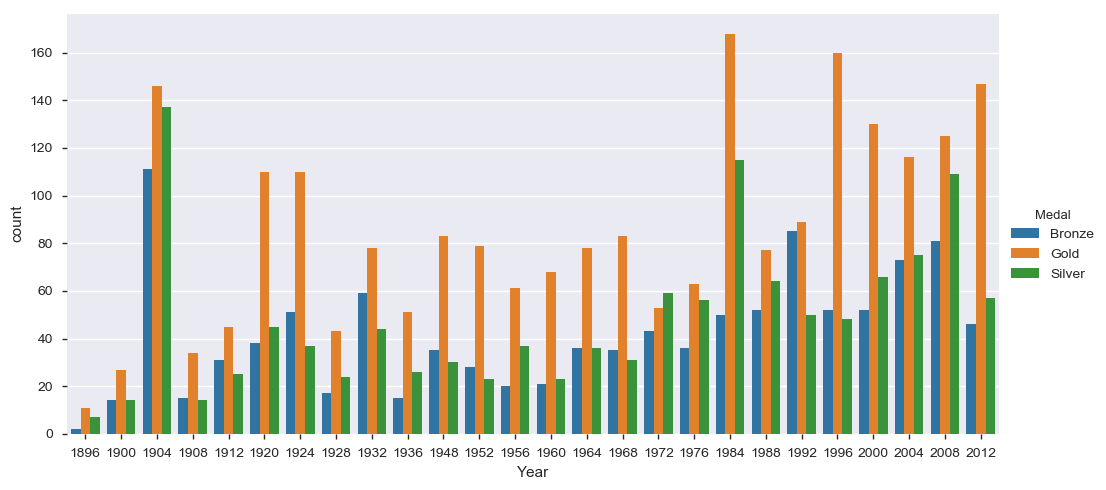

In [180]:
'''
Size will change the height, while maintaining the aspect ratio (so it will also also get wider if only size is changed.)
Aspect will change the width while keeping the height constant.
'''
sns.factorplot('Year', hue='Medal', kind='count', data=usa_data,size=5, aspect=2);


### Q7. Medal percentage for USA for each sport till date for Gender = Men

In [190]:
r=usa_data[['Gender','Sport','Medal']].groupby(['Gender','Sport'],as_index=False).agg({'Medal': np.count_nonzero})
r.columns

Index([u'Gender', u'Sport', u'Medal'], dtype='object')

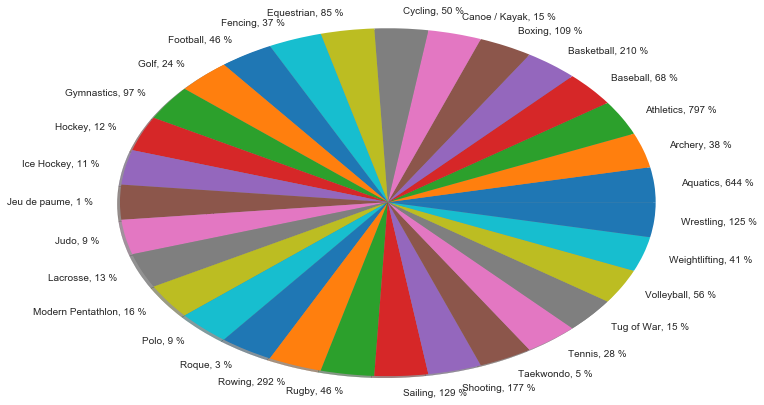

In [245]:
values=r['Medal'].tolist()
labels=r['Sport'].tolist()
r['Sport'][r['Gender'] == 'Men'].value_counts().plot.pie(radius=2,labels=['%s, %.0f %%' % (l, s) for l, s in zip(labels, values)],
                                                        shadow=True)